#####  Feature Engineering + Preprocessing

In [5]:
import pandas as pd 
df=pd.read_csv(r"C:\Users\HP\PCOD-DETECTION\data\processed\cleaned_data.csv")
df.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,1,1,0,28,44.6,152.0,19.3,15,78,22,...,0,1.0,0,110,80,3,3,18.0,18.0,8.5
1,2,2,0,36,65.0,161.5,24.9,15,74,20,...,0,0.0,0,120,70,3,5,15.0,14.0,3.7
2,3,3,1,33,68.8,165.0,25.3,11,72,18,...,1,1.0,0,120,80,13,15,18.0,20.0,10.0
3,4,4,0,37,65.0,148.0,29.7,13,72,20,...,0,0.0,0,120,70,2,2,15.0,14.0,7.5
4,5,5,0,25,52.0,161.0,20.1,11,72,18,...,0,0.0,0,120,80,3,4,16.0,14.0,7.0


In [6]:
# Drop ID columns
df.drop(["Sl. No", "Patient File No."], axis=1, inplace=True)

In [8]:
#Select Top 15 Features Based on Correlation with Target
import seaborn as sns
import matplotlib.pyplot as plt

#computer correlation with target
correlations=df.corr(numeric_only=True)['PCOS (Y/N)'].drop('PCOS (Y/N)').sort_values(ascending=False)

#select top 15 features most correlated with PCOS
top_features=correlations.head(15).index.tolist()
print("Top 15 correlated features :\n", top_features)

Top 15 correlated features :
 ['Follicle No. (R)', 'Follicle No. (L)', 'Skin darkening (Y/N)', 'hair growth(Y/N)', 'Weight gain(Y/N)', 'Cycle(R/I)', 'Fast food (Y/N)', 'Pimples(Y/N)', 'AMH(ng/mL)', 'Weight (Kg)', 'BMI', 'Hair loss(Y/N)', 'Waist(inch)', 'Hip(inch)', 'Avg. F size (L) (mm)']


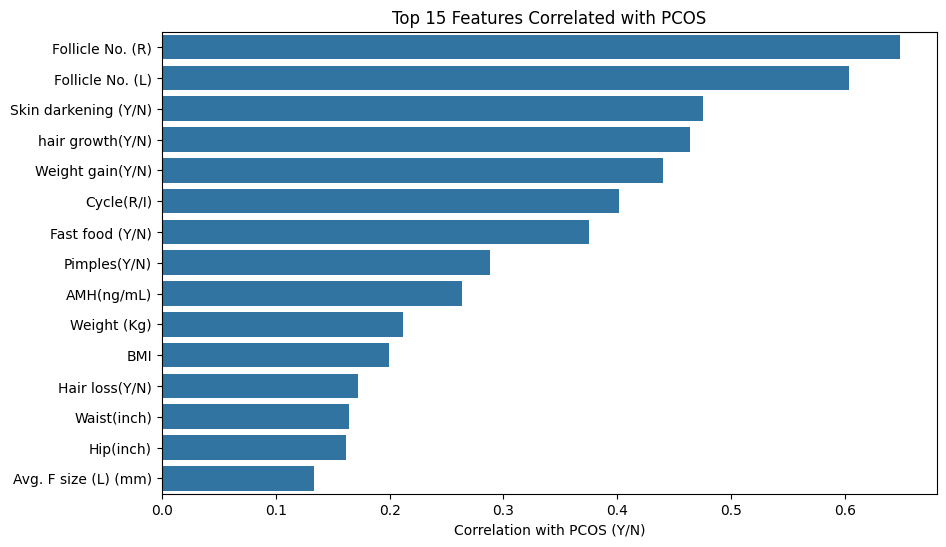

In [9]:
plt.figure(figsize=(10,6))
sns.barplot(x=correlations.head(15).values, y=top_features)
plt.title("Top 15 Features Correlated with PCOS")
plt.xlabel("Correlation with PCOS (Y/N)")
plt.show()

In [10]:
# Subset the Dataset for These Features + Target
selected_df=df[top_features+ ['PCOS (Y/N)']]

In [12]:
#Standardize the Numerical Features
from sklearn.preprocessing import StandardScaler
from joblib import dump

#separate features and target
X=selected_df.drop('PCOS (Y/N)',axis=1)
y=selected_df['PCOS (Y/N)']

#Initialize scaler and fit transform
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)


#save the scaler
dump(scaler,"scaler.joblib")

['scaler.joblib']

In [14]:
#Final Preprocessed Dataset Ready

# Convert scaled data back to DataFrame
X_scaled_df=pd.DataFrame(X_scaled,columns=X.columns)

#combine with target
final_data=pd.concat([X_scaled_df,y.reset_index(drop=True)],axis=1)
final_data.head()

,Follicle No. (R),Follicle No. (L),Skin darkening (Y/N),hair growth(Y/N),Weight gain(Y/N),Cycle(R/I),Fast food (Y/N),Pimples(Y/N),AMH(ng/mL),Weight (Kg),BMI,Hair loss(Y/N),Waist(inch),Hip(inch),Avg. F size (L) (mm),PCOS (Y/N)
0,-0.821501,-0.741039,-0.666221,-0.614452,-0.779194,-0.622331,0.967204,-0.978019,-0.604849,-1.364256,-1.234925,-0.911322,-1.068363,-0.503842,0.837271,0
1,-0.370677,-0.741039,-0.666221,-0.614452,-0.779194,-0.622331,-1.033908,-0.978019,-0.696746,0.485719,0.146043,-0.911322,-0.512299,0.000467,-0.004051,0
2,1.883440,1.623978,-0.666221,-0.614452,-0.779194,-0.622331,0.967204,1.022475,0.171168,0.830323,0.244683,1.097307,0.599828,0.504776,0.837271,1
3,-1.046912,-0.977540,-0.666221,-0.614452,-0.779194,-0.622331,-1.033908,-0.978019,-0.749502,0.485719,1.329730,-0.911322,0.599828,1.009084,-0.004051,0
4,-0.596089,-0.741039,-0.666221,-0.614452,-0.779194,-0.622331,-1.033908,-0.978019,-0.572515,-0.693187,-1.037644,1.097307,-1.068363,-0.251687,0.276390,0


In [15]:
#Categorical Encoding (if needed)
# For binary categorical (0/1), no need to encode
# For nominal categorical (more than 2 unique non-ordinal values):
X_encoded=pd.get_dummies(df,drop_first=True)

In [17]:
final_df = pd.concat([X_scaled_df, y.reset_index(drop=True)], axis=1)
final_df.to_csv("Day5-preprocessed.csv",index=False)
print("Preprocessed dataset saved as 'Day5-preprocessed.csv' ")

Preprocessed dataset saved as 'Day5-preprocessed.csv' 
